# Importing Required Modules

In [7]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Reading CSV DataSet Files

In [8]:
dftrain = pd.read_csv('Phising_Training_Dataset.csv')
dftrain.shape

(8955, 32)

In [9]:
dftest = pd.read_csv('Phising_Testing_Dataset.csv')
dftest

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,23433,-1,-1,-1,1,-1,-1,1,1,1,...,1,1,1,1,-1,1,-1,-1,1,1
2096,23434,1,1,1,-1,1,-1,1,1,-1,...,1,-1,1,-1,1,-1,1,1,1,1
2097,23435,1,-1,1,1,1,-1,-1,-1,1,...,1,1,1,-1,1,0,-1,1,0,1
2098,23436,1,-1,1,-1,1,-1,0,-1,-1,...,1,-1,-1,1,1,-1,-1,1,1,1


# Seperating Result Column to train model based on it to be predicted

In [10]:
train_y = dftrain.pop('Result')
train_y

0      -1
1      -1
2      -1
3      -1
4       1
       ..
8950    1
8951   -1
8952   -1
8953   -1
8954   -1
Name: Result, Length: 8955, dtype: int64

# Train_Test_Split()

## Split arrays or matrices into random train and test subsets.

test_size:- float or int, default=None, If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

random_state :- int, RandomState instance or None, default=None , Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dftrain, train_y, test_size=0.3, random_state=101)

# GridSearchCV()

## Exhaustive search over specified parameter values for an estimator.

### Important members are fit, predict.

 GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, **“predict”**, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

# RandomForestClassifier()

## A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

### n_estimatorsint, default=100
The number of trees in the forest.

### random_state:- int, RandomState instance or None, default=None
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).

### verbose:- int, default=0
Controls the verbosity when fitting and predicting.


In [12]:
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.966 total time=   0.2s
[CV 2/5] END ..................n_estimators=100;, score=0.964 total time=   0.2s
[CV 3/5] END ..................n_estimators=100;, score=0.963 total time=   0.2s
[CV 4/5] END ..................n_estimators=100;, score=0.967 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.962 total time=   0.2s
[CV 1/5] END ..................n_estimators=200;, score=0.963 total time=   0.5s
[CV 2/5] END ..................n_estimators=200;, score=0.964 total time=   0.5s
[CV 3/5] END ..................n_estimators=200;, score=0.965 total time=   0.5s
[CV 4/5] END ..................n_estimators=200;, score=0.967 total time=   0.6s
[CV 5/5] END ..................n_estimators=200;, score=0.963 total time=   0.5s
[CV 1/5] END ..................n_estimators=300;, score=0.961 total time=   0.8s
[CV 2/5] END ..................n_estimators=300;,

# Checking if Our prediction is giving correct answer or no

In [13]:
prediction = grid_cv.predict(dftrain)
prediction

print(f"Prediction:- {prediction[2000]}, Actual:- {train_y[2000]} ")

print(accuracy_score(train_y, prediction))

Prediction:- -1, Actual:- -1 
0.9883863763260748


# Classification_report()

### Build a text report showing the main classification metrics.

#### y_true:- 1d array-like, or label indicator array / sparse matrix , Ground truth (correct) target values.

#### y_pred :- 1d array-like, or label indicator array / sparse matrix, Estimated targets as returned by a classifier.

# confusion_matrix()

## Compute confusion matrix to evaluate the accuracy of a classification.

#### By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i and predicted to be in group j.

#### Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.


#### y_true:- array-like of shape (n_samples,) Ground truth (correct) target values.

#### y_pred:- array-like of shape (n_samples,) Estimated targets as returned by a classifier.

# Accuracy_score()

### Accuracy classification score. In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

#### y_true:- 1d array-like, or label indicator array / sparse matrix Ground truth (correct) labels.

#### y_pred:- 1d array-like, or label indicator array / sparse matrix, Predicted labels, as returned by a classifier.

In [14]:
print(classification_report(train_y,prediction))
print('\n')
print(confusion_matrix(train_y,prediction))
print('\n')
print('Acuuracy is --> ',accuracy_score(train_y,prediction)*100)
print('\n')

              precision    recall  f1-score   support

          -1       0.99      0.98      0.99      3921
           1       0.99      0.99      0.99      5034

    accuracy                           0.99      8955
   macro avg       0.99      0.99      0.99      8955
weighted avg       0.99      0.99      0.99      8955



[[3859   62]
 [  42 4992]]


Acuuracy is -->  98.83863763260749




# predict()

#### This function predicts on the training basis with fit 

In [15]:
prdic = grid_cv.predict(dftest)
prdic

array([ 1, -1, -1, ..., -1,  1,  1], dtype=int64)

## Concating two Dataframes 

In [16]:
keys = dftest['key']
values = pd.DataFrame(prdic)
frames = [keys,values]
result = pd.concat(frames, axis=1)
result.columns= ['key','Result']
result

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,1


# Converting DataFrame to Csv File with Index = False,which doesnt add index values in csv file

In [17]:
result.to_csv('Submission.csv',index=False)

# Representing No.of Legitimate Websites  vs Phishing Websites

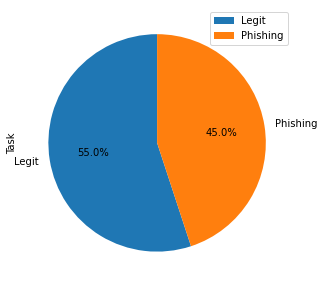

In [18]:
count = result['Result'].value_counts()
legit = count[1]
phis = count[-1]
dt = {'Task':[legit,phis]}
wpp_df = pd.DataFrame(dt,columns=['Task'],index = ['Legit','Phishing'])
wpp_df.plot.pie(y='Task',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()